<a href="https://colab.research.google.com/github/Akashkunwar/Dscourses/blob/main/Guvi/Assignment/Task%207/Assignment_10_Glass_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# !pip install dataprep
# Run this code to do import datapred

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from dataprep.eda import *
from dataprep.eda import plot
from dataprep.eda import plot_correlation
from dataprep.eda import plot_missing

import warnings
warnings.filterwarnings("ignore")

In [27]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%207/Assignment%2010%20data/Assignment10_trainKNN.txt",
                       names=['id','refractive_index','sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron','type'], header=None)
test_df = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%207/Assignment%2010%20data/Assignment10_testKNN.txt",
                       names=['id','refractive_index','sodium','magnesium','aluminum','silicon','potassium','calcium','barium','iron','type'], header=None)

# Columns description 
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -  1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

# EDA

In [28]:
train_df

id  refractive_index  sodium  magnesium  aluminum  silicon  potassium  \
0      1           1.52101   13.64       4.49      1.10    71.78       0.06   
1      2           1.51761   13.89       3.60      1.36    72.73       0.48   
2      3           1.51618   13.53       3.55      1.54    72.99       0.39   
3      4           1.51766   13.21       3.69      1.29    72.61       0.57   
4      5           1.51742   13.27       3.62      1.24    73.08       0.55   
..   ...               ...     ...        ...       ...      ...        ...   
191  207           1.51645   14.94       0.00      1.87    73.11       0.00   
192  208           1.51831   14.39       0.00      1.82    72.86       1.41   
193  209           1.51640   14.37       0.00      2.74    72.85       0.00   
194  210           1.51623   14.14       0.00      2.88    72.61       0.08   
195  211           1.51685   14.92       0.00      1.99    73.06       0.00   

     calcium  barium  iron  type  
0       8.75    0.00   0.0     1  
1       7.83    0.00   0.0     1  
2       7.78    0.00   0.0     1  
3       8.22    0.00   0.0     1  
4       8.07    0.00   0.0     1  
..       ...     ...   ...   ...  
191     8.67    1.38   0.0     7  
192     6.47    2.88   0.0     7  
193     9.45    0.54   0.0     7  
194     9.18    1.06   0.0     7  
195     8.40    1.59   0.0     7  

[196 rows x 11 columns]

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                196 non-null    int64  
 1   refractive_index  196 non-null    float64
 2   sodium            196 non-null    float64
 3   magnesium         196 non-null    float64
 4   aluminum          196 non-null    float64
 5   silicon           196 non-null    float64
 6   potassium         196 non-null    float64
 7   calcium           196 non-null    float64
 8   barium            196 non-null    float64
 9   iron              196 non-null    float64
 10  type              196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [30]:
train_df.describe()

id  refractive_index      sodium   magnesium    aluminum  \
count  196.000000        196.000000  196.000000  196.000000  196.000000   
mean   102.862245          1.518295   13.375204    2.758980    1.454337   
std     61.195663          0.003055    0.783145    1.392641    0.491688   
min      1.000000          1.511310   10.730000    0.000000    0.290000   
25%     49.750000          1.516458   12.877500    2.362500    1.190000   
50%    101.500000          1.517630   13.280000    3.480000    1.360000   
75%    153.250000          1.518985   13.792500    3.610000    1.622500   
max    211.000000          1.533930   15.790000    4.490000    3.500000   

          silicon   potassium     calcium      barium        iron        type  
count  196.000000  196.000000  196.000000  196.000000  196.000000  196.000000  
mean    72.635408    0.519388    8.910714    0.164235    0.050255    2.668367  
std      0.763578    0.672703    1.421490    0.485198    0.086359    2.062416  
min     69.810000    0.000000    5.430000    0.000000    0.000000    1.000000  
25%     72.317500    0.140000    8.220000    0.000000    0.000000    1.000000  
50%     72.810000    0.560000    8.575000    0.000000    0.000000    2.000000  
75%     73.080000    0.610000    9.092500    0.000000    0.090000    3.000000  
max     75.180000    6.210000   16.190000    3.150000    0.340000    7.000000

In [31]:
train_df.corr().style.background_gradient(cmap='coolwarm')

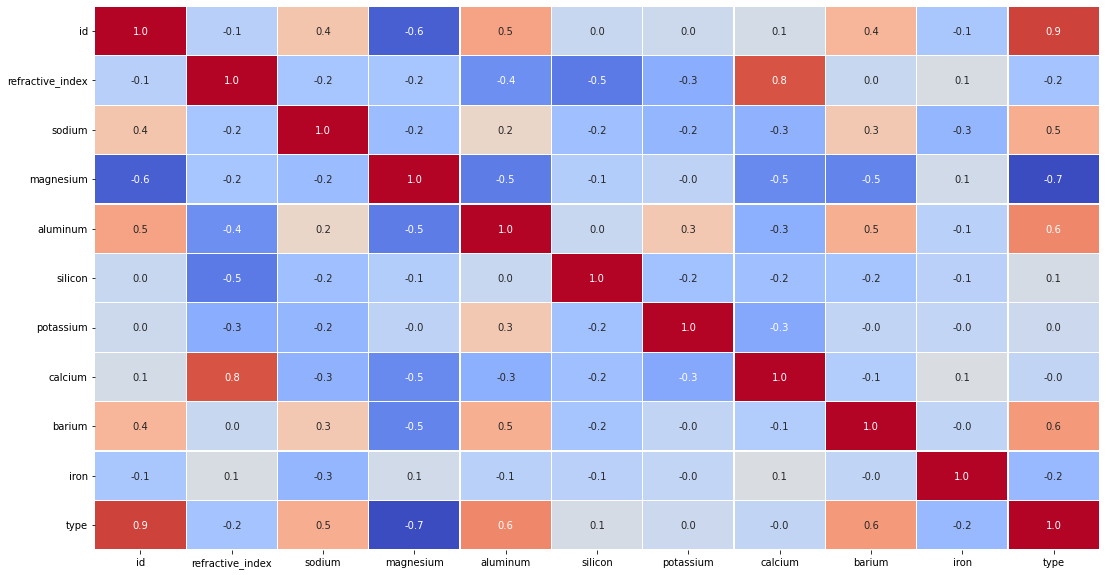

In [32]:
plt.figure(figsize=(18,10))
sns.heatmap(train_df.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');


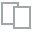
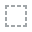
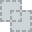
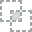
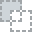
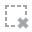
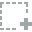
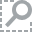
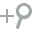
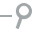
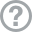
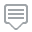
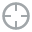
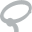
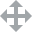
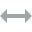
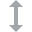
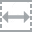
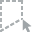
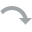
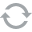
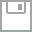
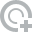
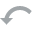
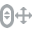
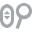
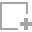
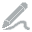
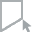
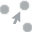
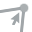
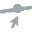

In [33]:
plot(train_df)

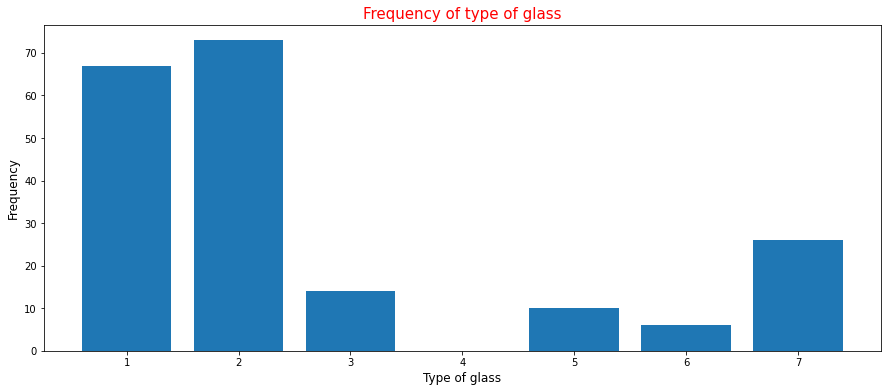

In [34]:
fig, ax = plt.subplots(figsize = (15,6))
plt.bar(list(train_df.type.value_counts().index),list(train_df.type.value_counts()))
plt.xlabel("Type of glass",size=12)
plt.ylabel("Frequency",size=12)
plt.title("Frequency of type of glass",size=15,color='red')
plt.show()

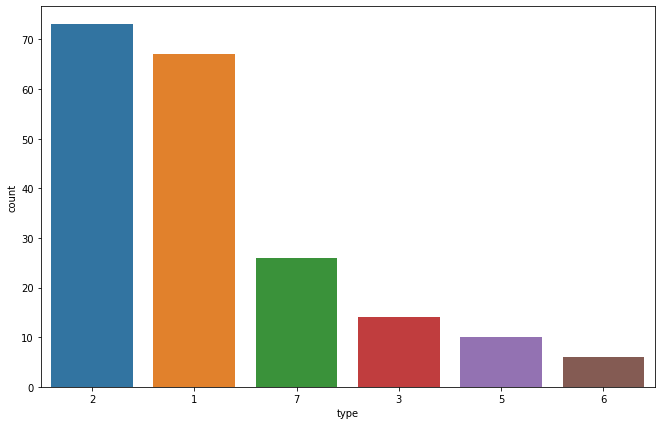

In [35]:
plt.figure(figsize=(11,7))
sns.countplot(x='type', data=train_df, order=train_df['type'].value_counts().index);

DataPrep Report
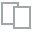
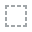
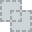
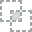
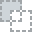
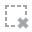
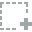
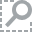
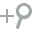
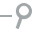
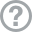
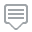
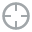
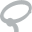
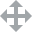
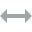
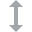
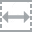
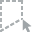
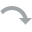
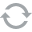
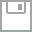
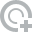
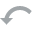
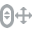
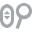
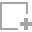
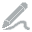
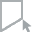
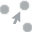
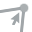
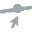

In [36]:
create_report(train_df)

In [37]:
train_df

id  refractive_index  sodium  magnesium  aluminum  silicon  potassium  \
0      1           1.52101   13.64       4.49      1.10    71.78       0.06   
1      2           1.51761   13.89       3.60      1.36    72.73       0.48   
2      3           1.51618   13.53       3.55      1.54    72.99       0.39   
3      4           1.51766   13.21       3.69      1.29    72.61       0.57   
4      5           1.51742   13.27       3.62      1.24    73.08       0.55   
..   ...               ...     ...        ...       ...      ...        ...   
191  207           1.51645   14.94       0.00      1.87    73.11       0.00   
192  208           1.51831   14.39       0.00      1.82    72.86       1.41   
193  209           1.51640   14.37       0.00      2.74    72.85       0.00   
194  210           1.51623   14.14       0.00      2.88    72.61       0.08   
195  211           1.51685   14.92       0.00      1.99    73.06       0.00   

     calcium  barium  iron  type  
0       8.75    0.00   0.0     1  
1       7.83    0.00   0.0     1  
2       7.78    0.00   0.0     1  
3       8.22    0.00   0.0     1  
4       8.07    0.00   0.0     1  
..       ...     ...   ...   ...  
191     8.67    1.38   0.0     7  
192     6.47    2.88   0.0     7  
193     9.45    0.54   0.0     7  
194     9.18    1.06   0.0     7  
195     8.40    1.59   0.0     7  

[196 rows x 11 columns]

# Splitting

In [38]:
# Splitting training Data
X_train = train_df.drop(['id','type'],axis=1)
Y_train = train_df['type']

# Splitting testing Data
X_test = test_df.drop(['id','type'],axis=1)
Y_test = test_df['type']

In [39]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(196, 9)
(18, 9)
(196,)
(18,)


In [40]:
X_train

refractive_index  sodium  magnesium  aluminum  silicon  potassium  \
0             1.52101   13.64       4.49      1.10    71.78       0.06   
1             1.51761   13.89       3.60      1.36    72.73       0.48   
2             1.51618   13.53       3.55      1.54    72.99       0.39   
3             1.51766   13.21       3.69      1.29    72.61       0.57   
4             1.51742   13.27       3.62      1.24    73.08       0.55   
..                ...     ...        ...       ...      ...        ...   
191           1.51645   14.94       0.00      1.87    73.11       0.00   
192           1.51831   14.39       0.00      1.82    72.86       1.41   
193           1.51640   14.37       0.00      2.74    72.85       0.00   
194           1.51623   14.14       0.00      2.88    72.61       0.08   
195           1.51685   14.92       0.00      1.99    73.06       0.00   

     calcium  barium  iron  
0       8.75    0.00   0.0  
1       7.83    0.00   0.0  
2       7.78    0.00   0.0  
3       8.22    0.00   0.0  
4       8.07    0.00   0.0  
..       ...     ...   ...  
191     8.67    1.38   0.0  
192     6.47    2.88   0.0  
193     9.45    0.54   0.0  
194     9.18    1.06   0.0  
195     8.40    1.59   0.0  

[196 rows x 9 columns]

# Training Euclidean & Manhattan model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('manhattan')

In [43]:
from sklearn.metrics import classification_report

In [50]:
euclidean = KNeighborsClassifier(n_neighbors=1, metric='euclidean') # Square Euclidean distance model
manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan') # Manhattan distance model

In [51]:
euclidean.fit(X_train, Y_train)
manhattan.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

# Testing Model

In [52]:
e_pred = euclidean.predict(X_test)
m_pred = manhattan.predict(X_test)

In [53]:
m_pred

array([1, 1, 1, 2, 1, 3, 3, 1, 1, 5, 2, 5, 2, 2, 6, 7, 7, 7])

In [54]:
df = pd.DataFrame({"actual":Y_test, "euclidean":e_pred, "manhattan":m_pred})
df.head()

actual  euclidean  manhattan
0       1          1          1
1       1          1          1
2       1          1          1
3       2          1          2
4       2          1          1

# Checking Score

In [68]:
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclidean'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))

Manhattan Accuracy: 61.11%
Square Euclidean Accuracy: 61.11%


In [57]:
from sklearn.metrics import f1_score

In [67]:
print('Manhattan Accuracy: ',f1_score(Y_test,m_pred,average='micro'))
print('Square Euclidean Accuracy: ',f1_score(Y_test,e_pred,average='micro'))

Manhattan Accuracy:  0.6111111111111112
Square Euclidean Accuracy:  0.6111111111111112
